In [ ]:
!pip install transformers accelerate safetensors

In [2]:
!pip install invisible-watermark>=0.2.0

In [4]:
!pip install diffusers["torch"]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.5 MB/s eta 0:00:00


In [5]:
from diffusers import StableDiffusionXLPipeline
import torch

pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipe.to("cuda")

prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"
image = pipe(prompt=prompt).images[0]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

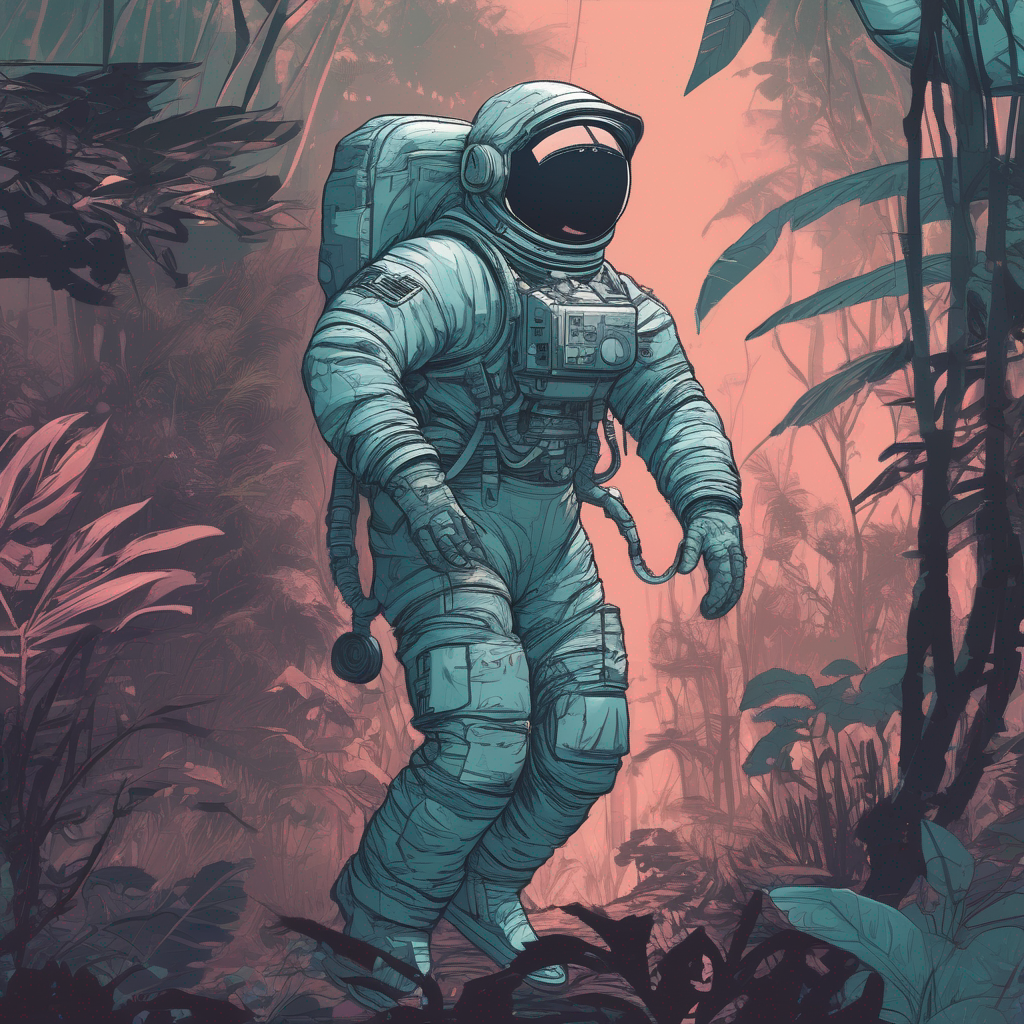

In [6]:
image

In [9]:
from diffusers import StableDiffusionXLImg2ImgPipeline
from diffusers.utils import load_image

In [16]:
pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipe = pipe.to("cuda")
url = "diffusion.jpeg"

init_image = load_image(url).convert("RGB")
prompt = "make background looks like he is in space "
image = pipe(prompt, image=init_image).images[0]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

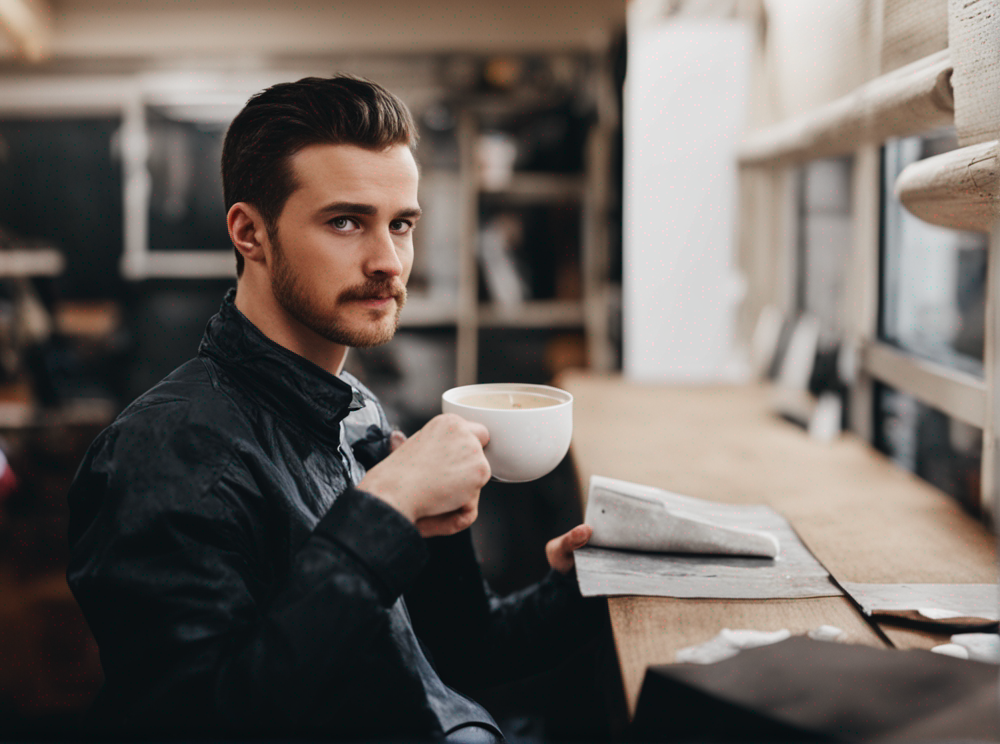

In [17]:
image